# Preprocessing H&E : Remove background

Large RAM is needed (r5.4xlarge: 16vCPUs, 128GB RAM)

https://datacarpentry.org/image-processing/07-thresholding/

# 1. Import packages and data

In [ ]:
pip install opencv-python

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation

In [2]:
input_image = "./../input_images"
intermediate_images = "./intermediate_images"
output_image_workspace = "output_images"
output_image_sb =  "/sbgenomics/files/data/remove_background"
os.makedirs(output_image_sb, exist_ok=True)

In [3]:
# Import images from PDAC dataset
img_A1 = cv2.imread(f'{input_image}/PDAC_12747476B_A1.jpg')
img_B2 = cv2.imread(f'{input_image}/PDAC_ILS50185PT2_B2.jpg')
img_C3 = cv2.imread(f'{input_image}/PanCN_AVD_79MZ_0594_C3.jpg')
img_D4 = cv2.imread(f'{input_image}/PanCN_AVD_61VQ_0158_D4.jpg')

In [4]:
# Import images from DPLFC dataset
DPLFC_151507 = cv2.imread(f'{input_image}/DPFLC/151507.tif')
DPLFC_151508 = cv2.imread(f'{input_image}/DPFLC/151508.tif')
DPLFC_151669 = cv2.imread(f'{input_image}/DPFLC/151669.tif')
DPLFC_151670 = cv2.imread(f'{input_image}/DPFLC/151670.tif')
DPLFC_151674 = cv2.imread(f'{input_image}/DPFLC/151674.tif')


In [18]:
DPLFC_151509 = cv2.imread(f'{input_image}/DPFLC/151509.tif')
DPLFC_151510 = cv2.imread(f'{input_image}/DPFLC/151510.tif')

DPLFC_151671 = cv2.imread(f'{input_image}/DPFLC/151671.tif')
DPLFC_151672 = cv2.imread(f'{input_image}/DPFLC/151672.tif')
DPLFC_151673 = cv2.imread(f'{input_image}/DPFLC/151673.tif')

DPLFC_151675 = cv2.imread(f'{input_image}/DPFLC/151675.tif')


In [19]:
DPLFC_151676 = cv2.imread(f'{input_image}/DPFLC/151676.tif')

In [1]:
V1_Adult_Mouse_Brain_image = cv2.imread(f'{input_image}/mouse_brain/V1_Adult_Mouse_Brain_image.tif')
V1_Mouse_Brain_Sagittal_Anterior_image = cv2.imread(f'{input_image}/mouse_brain/V1_Mouse_Brain_Sagittal_Anterior_image.tif')
V1_Mouse_Brain_Sagittal_Anterior_Section_2_image = cv2.imread(f'{input_image}/mouse_brain/V1_Mouse_Brain_Sagittal_Anterior_Section_2_image.tif')
V1_Mouse_Brain_Sagittal_Posterior_image = cv2.imread(f'{input_image}/mouse_brain/V1_Mouse_Brain_Sagittal_Posterior_image.tif')
V1_Mouse_Brain_Sagittal_Posterior_Section_2_image = cv2.imread(f'{input_image}/mouse_brain/V1_Mouse_Brain_Sagittal_Posterior_Section_2_image.tif')

NameError: name 'cv2' is not defined

# 2. Fonction definition

In [8]:
def remove_background(img, image_name, output_image_sb, output_image_workspace):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # add threshold
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    # invert threshold
    inv_thresh = cv2.bitwise_not(thresh)
    # define kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    # perform closing (erosion then dilatation)
    closing = cv2.morphologyEx(inv_thresh, cv2.MORPH_CLOSE, kernel)
    # blur the image
    blur = cv2.blur(closing,(250,250))
    # add gaussian filter
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    # set threshold
    t = 0.9
    # conserve values below threshold
    binary_mask = blurred_shapes < t
    # create and apply mask
    selection = img.copy()
    selection[~binary_mask] = 0
    
    # save result
    cv2.imwrite(f"{output_image_sb}/{image_name}_without_background.jpg", selection)
    cv2.imwrite(f"{output_image_workspace}/{image_name}_without_background.jpg", selection)
    
    # plot result
    fig, ax = plt.subplots()
    plt.axis("off")
    plt.imshow(selection)

In [ ]:
def remove_background(img, image_name, output_image_sb, output_image_workspace):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # add threshold
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    # define kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    # perform closing (erosion then dilatation)
    closing = cv2.morphologyEx(inv_thresh, cv2.MORPH_CLOSE, kernel)
    # blur the image
    blur = cv2.blur(closing,(250,250))
    # add gaussian filter
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    # set threshold
    t = skimage.filters.threshold_li(blurred_shapes)
    print("Found automatic threshold t = {}.".format(t))
    binary_mask = blurred_shapes < t
    # conserve values below threshold
    binary_mask = blurred_shapes < t
    # create and apply mask
    selection = img.copy()
    selection[~binary_mask] = 0
    
    # save result
    cv2.imwrite(f"{output_image_sb}/{image_name}_without_background.jpg", selection)
    cv2.imwrite(f"{output_image_workspace}/{image_name}_without_background.jpg", selection)
    
    # plot result
    fig, ax = plt.subplots()
    plt.axis("off")
    plt.imshow(selection)

# 3. Perfom preprocessing

## 3.1. A1

In [47]:
image_name = "A1"

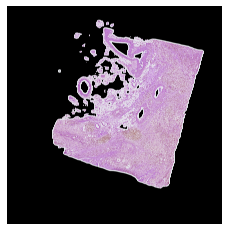

In [50]:
remove_background(img_A1)

## 3.2. B2

In [51]:
image_name = "B2"

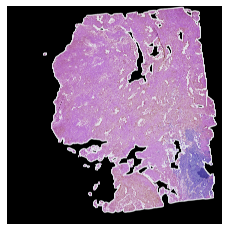

In [52]:
remove_background(img_B2)

## 3.3. C3

In [53]:
image_name = "C3"

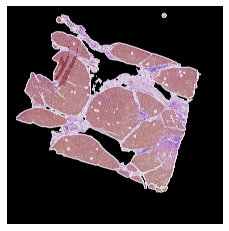

In [54]:
remove_background(img_C3)

## 3.4. D4

In [55]:
image_name = "D4"

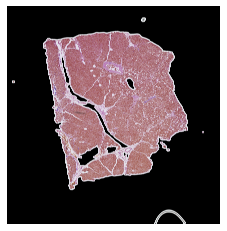

In [56]:
remove_background(img_D4)

# 4. Example step by step

In [4]:
img = cv2.imread(f'{input_image}/PDAC_12747476B_A1.jpg')

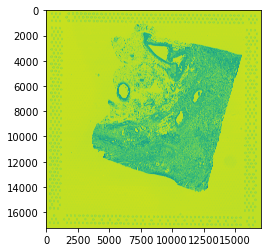

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

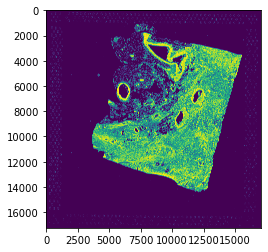

In [8]:
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

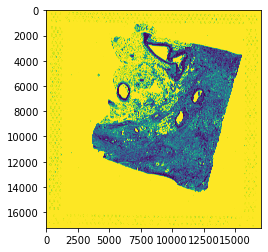

In [9]:
inv_thresh = cv2.bitwise_not(thresh)
plt.imshow(inv_thresh)

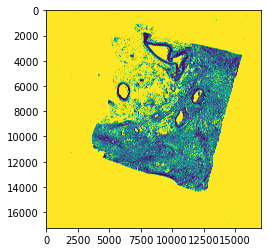

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
closing = cv2.morphologyEx(inv_thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

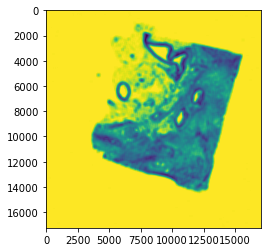

In [17]:
blur = cv2.blur(closing,(250,250))
plt.imshow(blur)

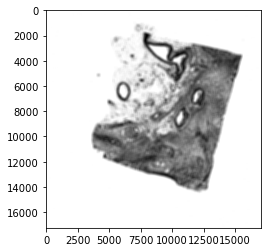

In [41]:
# blur the image to denoise
blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
plt.imshow(blurred_shapes, cmap="gray")

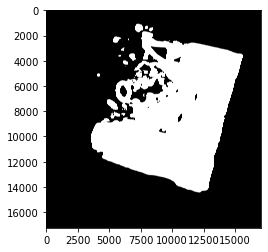

In [42]:
t = 0.9
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

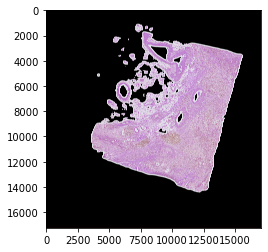

In [44]:
selection = img.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [45]:
cv2.imwrite(f"im_without_background.jpg", selection)

True

# 5. 151673 preprocessing

Data are from : https://deepst-tutorials.readthedocs.io/en/latest/Tutorial%201_10X%20Visium.html

In [8]:
image_name = "151673"

In [5]:
img_151673 = cv2.imread("./../visiopharm/visium/151673_full_image.tif")

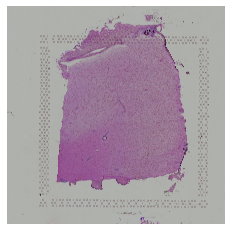

In [9]:
remove_background(img_151673)

In [10]:
img = img_151673

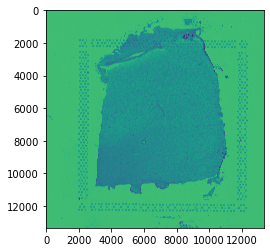

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

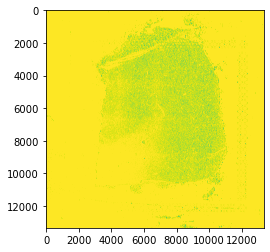

In [12]:
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

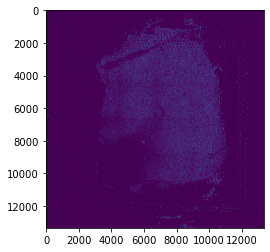

In [13]:
inv_thresh = cv2.bitwise_not(thresh)
plt.imshow(inv_thresh)

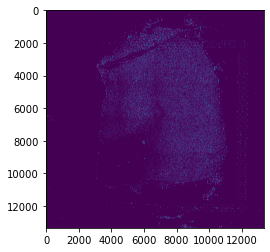

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
closing = cv2.morphologyEx(inv_thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

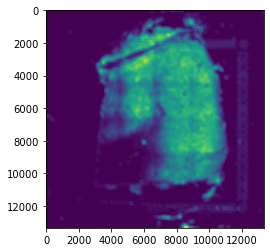

In [15]:
blur = cv2.blur(closing,(250,250))
plt.imshow(blur)

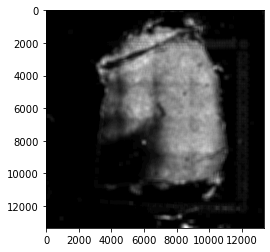

In [16]:
# blur the image to denoise
blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
plt.imshow(blurred_shapes, cmap="gray")

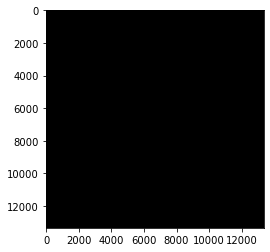

In [17]:
t = 0.9
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

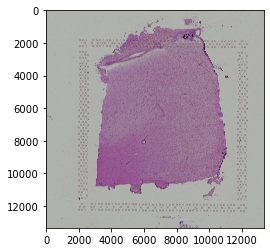

In [18]:
selection = img.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

# test with coronal brain

In [5]:
coronal_brain = cv2.imread(f'{input_image}/V1_Adult_Mouse_Brain_image.tif')

In [6]:
image_name = "coronal_brain"

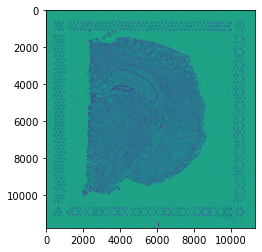

In [34]:
gray = cv2.cvtColor(coronal_brain, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

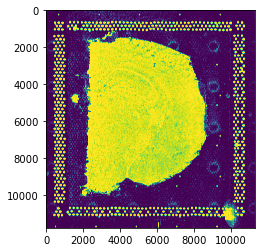

In [37]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

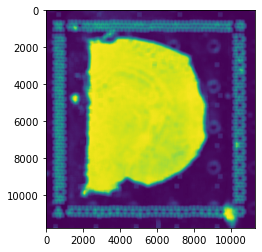

In [49]:
blur = cv2.blur(thresh,(250,250))
plt.imshow(blur)

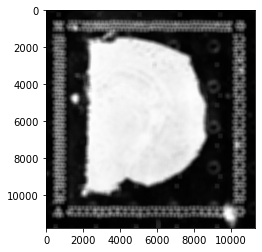

In [50]:
blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
plt.imshow(blurred_shapes, cmap="gray")

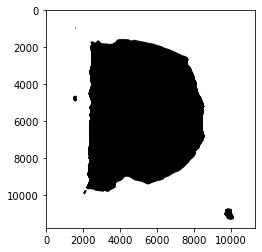

In [58]:
t = 0.8
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

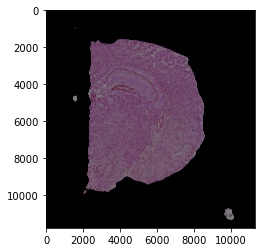

In [60]:
selection = coronal_brain.copy()
selection[binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [61]:
img_DPLFC = cv2.imread(f'{input_image}/151673.tif')

In [62]:
image_name = "DPLFC_151673"

In [92]:
def new_method(img, image_name):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    
    t = 0.99
    binary_mask = blurred_shapes < t
    
    selection = img.copy()
    selection[~binary_mask] = 0

    fig, ax = plt.subplots()
    plt.imshow(selection)
    
    #cv2.imwrite(f"./{image_name}_without_background.jpg", selection)


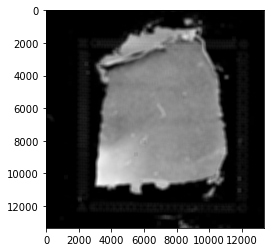

In [145]:
gray = cv2.cvtColor(img_DPLFC, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
blur = cv2.blur(thresh,(250,250))
blurred_shapes = skimage.filters.gaussian(blur, sigma=2.0)
plt.imshow(blurred_shapes, cmap="gray")


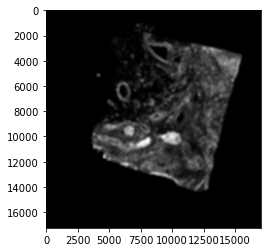

In [147]:
gray = cv2.cvtColor(img_A1, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
blur = cv2.blur(thresh,(250,250))
blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
plt.imshow(blurred_shapes, cmap="gray")


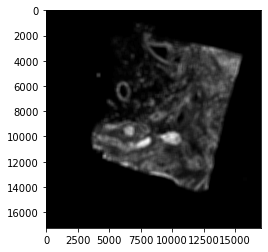

In [154]:
gray = cv2.cvtColor(img_A1, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
blur = cv2.blur(thresh,(300,300))
blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
plt.imshow(blurred_shapes, cmap="gray")


(0.0, 1.0)

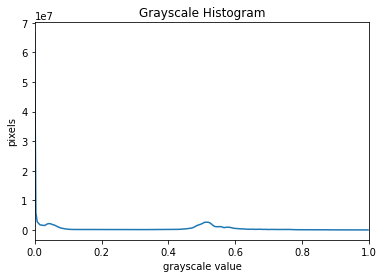

In [104]:
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

In [114]:
t = skimage.filters.threshold_otsu(blurred_shapes)
print("Found automatic threshold t = {}.".format(t))

Found automatic threshold t = 0.28104319852941173.


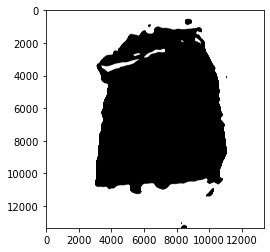

In [109]:
t = 0.3
binary_mask = blurred_shapes < t
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

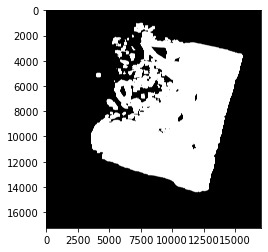

In [84]:
t = 0.99
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")


In [87]:
selection = img_A1.copy()
selection[~binary_mask] = 0

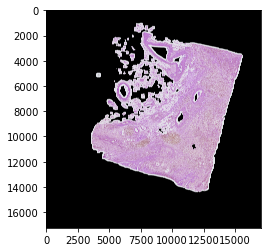

In [93]:
new_method(img_A1, image_name)

In [127]:
def method_2(img, image_name):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    
    t = skimage.filters.threshold_isodata(blurred_shapes)
    print("Found automatic threshold t = {}.".format(t))
    binary_mask = blurred_shapes < t
    
    selection = img.copy()
    selection[binary_mask] = 0

    fig, ax = plt.subplots()
    plt.imshow(selection)

Found automatic threshold t = 0.521484375.


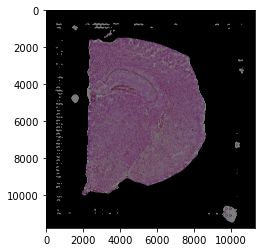

In [128]:
method_2(coronal_brain, "coronal_brain")

In [100]:
img_DPLFC = cv2.imread(f'{input_image}/151673.tif')

Found automatic threshold t = 0.28104319852941173.


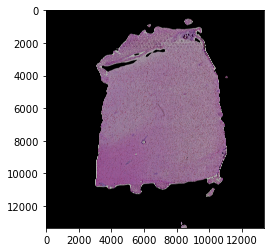

In [129]:
method_2(img_DPLFC, "img_DPLFC")

Found automatic threshold t = 0.04249387254901961.


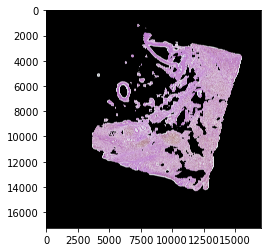

In [130]:
method_2(img_A1, "img_DPLFC")

In [15]:
from skimage.filters import try_all_threshold

In [156]:
def method_3(img, image_name):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    
    fig, ax = try_all_threshold(blurred_shapes, figsize=(10, 8), verbose=False)
    plt.show()
    
    #t = skimage.filters.threshold_otsu(blurred_shapes)
    #print("Found automatic threshold t = {}.".format(t))
    #binary_mask = blurred_shapes < t
    
    #selection = img.copy()
    #selection[~binary_mask] = 0

    #fig, ax = plt.subplots()
    #plt.imshow(selection)

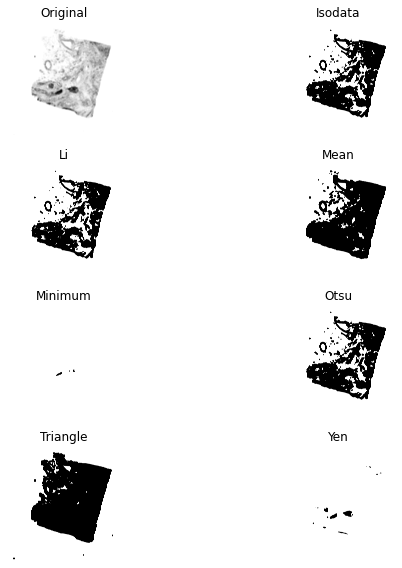

In [157]:
method_3(img_A1, "img_DPLFC")

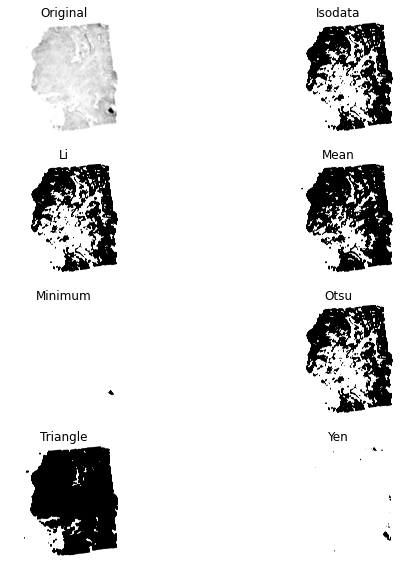

In [158]:
method_3(img_B2, "img_DPLFC")

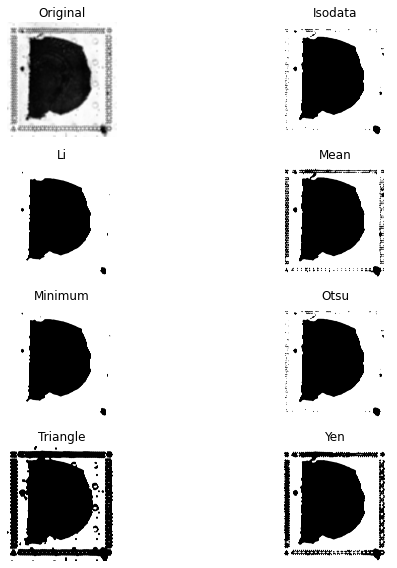

In [159]:
method_3(coronal_brain, "img_DPLFC")

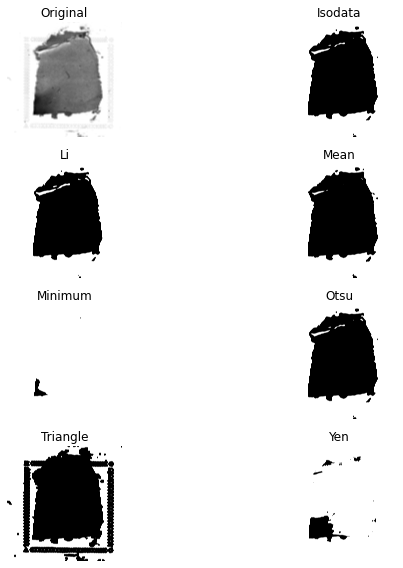

In [160]:
method_3(img_DPLFC, "img_DPLFC")

In [4]:
import cv2

# Pipeline modification

In [18]:
def choose_threshold_method(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)

    fig, ax = try_all_threshold(blurred_shapes, figsize=(10, 8), verbose=False)
    plt.show()

In [20]:
img_DPLFC = cv2.imread(f'../input_images/DPFLC/151507.tif')

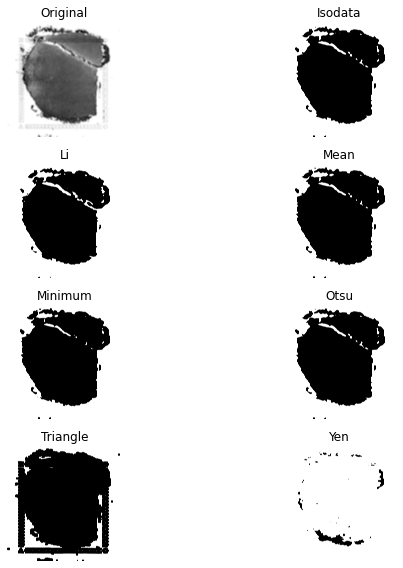

In [21]:
choose_threshold_method(img_DPLFC)

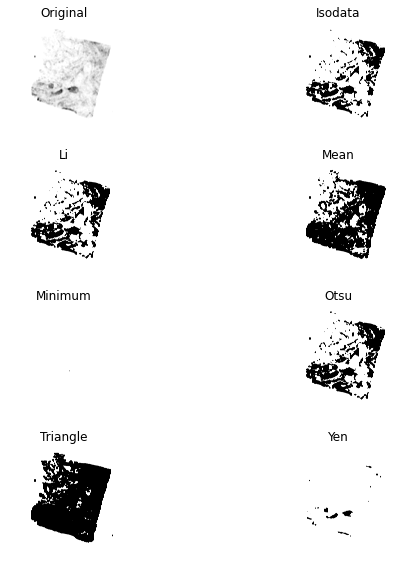

In [189]:
choose_threshold_method(img_A1)

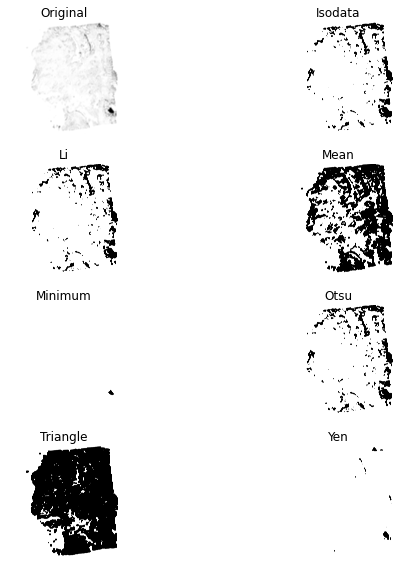

In [190]:
choose_threshold_method(img_B2)

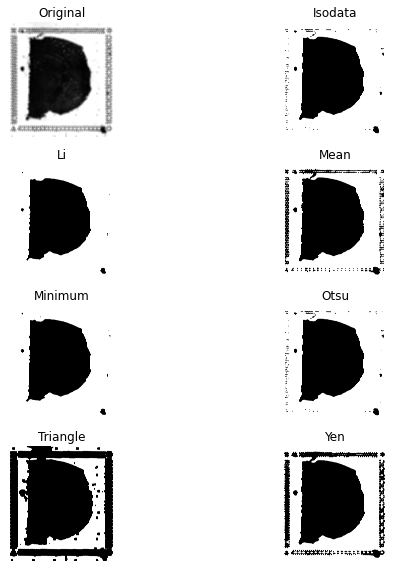

In [191]:
choose_threshold_method(coronal_brain)

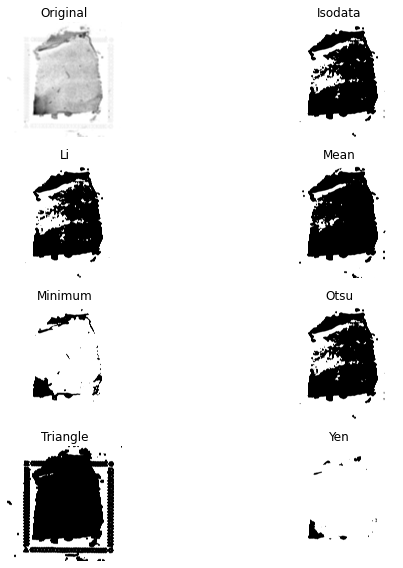

In [192]:
choose_threshold_method(img_DPLFC)

In [182]:
def new_remove_background_PDAC(img, image_name):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    # perform closing (erosion then dilatation)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    
    t = skimage.filters.threshold_triangle(blurred_shapes)
    print("Found automatic threshold t = {}.".format(t))
    binary_mask = blurred_shapes < t
    
    selection = img.copy()
    selection[~binary_mask] = 0

    fig, ax = plt.subplots()
    plt.imshow(selection)

Found automatic threshold t = 0.9982536764705883.


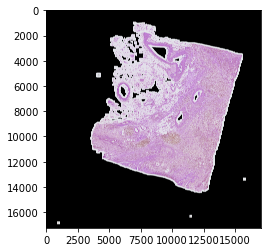

In [183]:
new_remove_background_PDAC(img_A1, "img_A1")

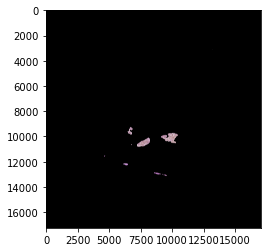

In [177]:
new_remove_background_PDAC_2(img_A1, "img_A1")

Found automatic threshold t = 0.990234375.


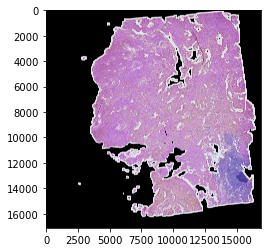

In [184]:
new_remove_background_PDAC(img_B2, "img_B2")

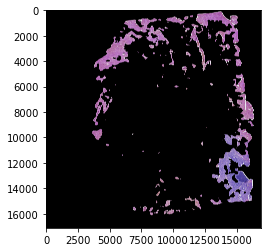

In [178]:
new_remove_background_PDAC_2(img_B2, "img_B2")

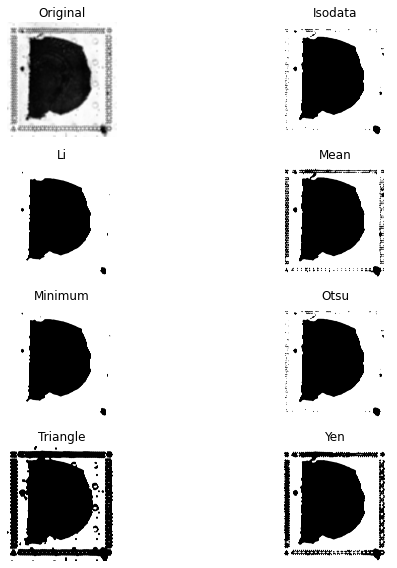

In [165]:
choose_threshold_method(coronal_brain)

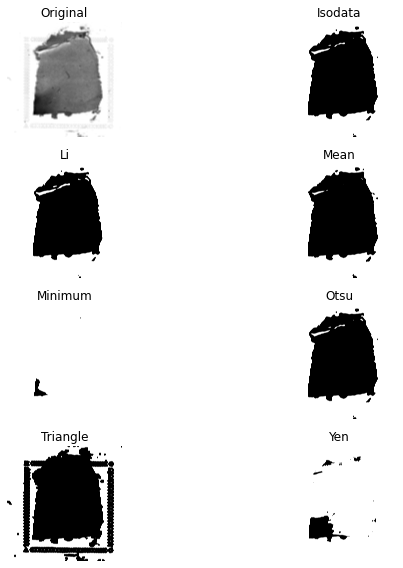

In [166]:
choose_threshold_method(img_DPLFC)

In [6]:
def new_remove_background_public_dataset(img, image_name):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    blur = cv2.blur(thresh,(250,250))
    blurred_shapes = skimage.filters.gaussian(blur, sigma=1.0)
    
    t = skimage.filters.threshold_li(blurred_shapes)
    print("Found automatic threshold t = {}.".format(t))
    binary_mask = blurred_shapes < t
    
    selection = img.copy()
    selection[~binary_mask] = 0

    # save result 
    cv2.imwrite(f"./../output_images/public_dataset/{image_name}_without_background.tif", selection)
    #cv2.imwrite(f"{output_image_workspace}/{image_name}_without_background.tif", selection)
    
    fig, ax = plt.subplots()
    plt.imshow(selection)

In [13]:
new_remove_background_public_dataset(coronal_brain, "coronal_brain")

NameError: name 'coronal_brain' is not defined

## Mouse brain

Found automatic threshold t = 0.7393957597003145.


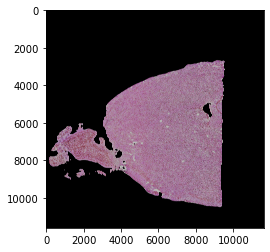

In [14]:
new_remove_background_public_dataset(V1_Mouse_Brain_Sagittal_Anterior_image, "V1_Mouse_Brain_Sagittal_Anterior_image")

Found automatic threshold t = 0.7597932051464393.


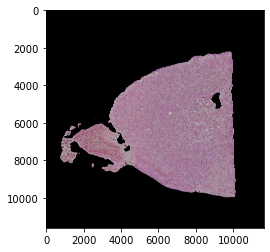

In [15]:
new_remove_background_public_dataset(V1_Mouse_Brain_Sagittal_Anterior_Section_2_image, "V1_Mouse_Brain_Sagittal_Anterior_Section_2_image")

Found automatic threshold t = 0.7385328251545127.


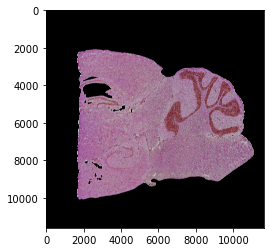

In [22]:
new_remove_background_public_dataset(V1_Mouse_Brain_Sagittal_Posterior_image, "V1_Mouse_Brain_Sagittal_Posterior_image")

Found automatic threshold t = 0.7553093109807915.


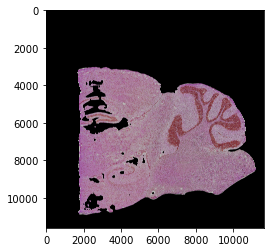

In [17]:
new_remove_background_public_dataset(V1_Mouse_Brain_Sagittal_Posterior_Section_2_image, "V1_Mouse_Brain_Sagittal_Posterior_Section_2_image")

## DPFLC

Found automatic threshold t = 0.7246597116989205.


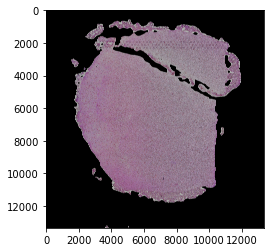

In [210]:
new_remove_background_public_dataset(DPLFC_151507, "DPLFC_151507")

Found automatic threshold t = 0.7367989416632825.


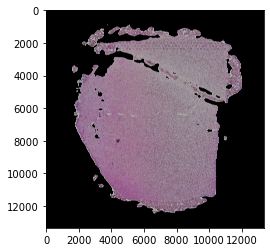

In [211]:
new_remove_background_public_dataset(DPLFC_151508, "DPLFC_151508")

Found automatic threshold t = 0.7057282003147392.


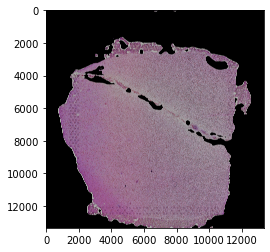

In [23]:
new_remove_background_public_dataset(DPLFC_151509, "DPLFC_151509")

Found automatic threshold t = 0.7356323426593182.


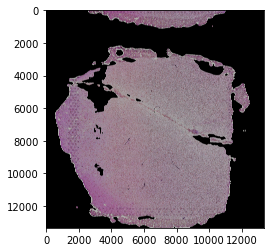

In [24]:
new_remove_background_public_dataset(DPLFC_151510, "DPLFC_151510")

Found automatic threshold t = 0.7720431754431113.


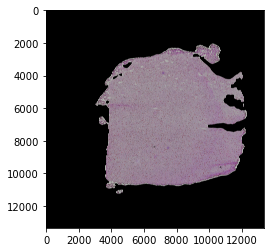

In [217]:
new_remove_background_public_dataset(DPLFC_151669, "DPLFC_151669")

Found automatic threshold t = 0.7645210303456739.


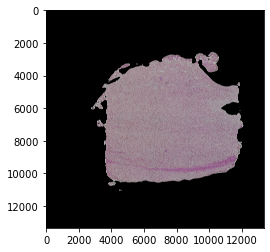

In [218]:
new_remove_background_public_dataset(DPLFC_151670, "DPLFC_151670")

Found automatic threshold t = 0.7329264646186817.


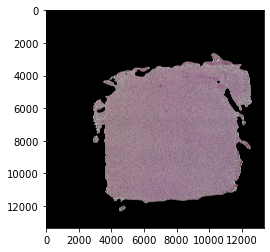

In [25]:
new_remove_background_public_dataset(DPLFC_151671, "DPLFC_151671")

Found automatic threshold t = 0.7455945209702846.


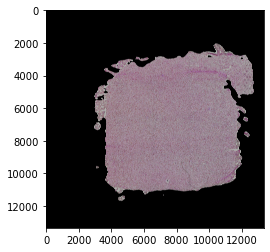

In [26]:
new_remove_background_public_dataset(DPLFC_151672, "DPLFC_151672")

Found automatic threshold t = 0.6802891656757619.


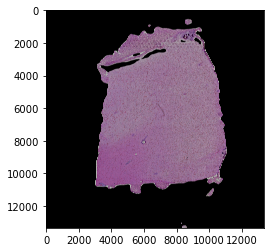

In [27]:
new_remove_background_public_dataset(DPLFC_151673, "DPLFC_151673")

Found automatic threshold t = 0.7197662869594157.


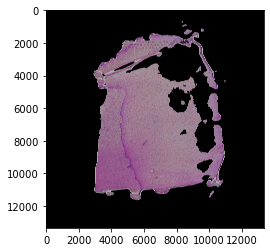

In [222]:
new_remove_background_public_dataset(DPLFC_151674, "DPLFC_151674")

Found automatic threshold t = 0.7263509829997976.


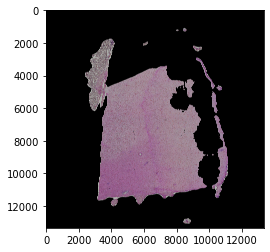

In [213]:
new_remove_background_public_dataset(DPLFC_151675, "DPLFC_151675")

Found automatic threshold t = 0.7433036501475633.


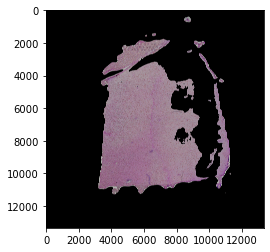

In [21]:
new_remove_background_public_dataset(DPLFC_151676, "DPLFC_151676")

In [ ]:
plt.imshow(DPLFC_151676)